<a href="https://colab.research.google.com/github/onepiece-nika/onepiece-nika/blob/main/DepuracionDeDatos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from google.colab import files
uploaded = files.upload()

Saving dataset_banco.csv to dataset_banco (1).csv


In [9]:
data = pd.read_csv('dataset_banco.csv')


In [10]:
print(data.shape)

(45215, 17)


In [11]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1,-1.0,0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1,-1.0,0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1,-1.0,0,unknown,no


In [12]:
data.info()       #variables categoricas(object) // variables numericas(int and float)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45215 entries, 0 to 45214
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45215 non-null  int64  
 1   job        45213 non-null  object 
 2   marital    45214 non-null  object 
 3   education  45214 non-null  object 
 4   default    45215 non-null  object 
 5   balance    45213 non-null  float64
 6   housing    45215 non-null  object 
 7   loan       45215 non-null  object 
 8   contact    45215 non-null  object 
 9   day        45215 non-null  int64  
 10  month      45215 non-null  object 
 11  duration   45214 non-null  float64
 12  campaign   45215 non-null  int64  
 13  pdays      45214 non-null  float64
 14  previous   45215 non-null  int64  
 15  poutcome   45215 non-null  object 
 16  y          45215 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 5.9+ MB


In [ ]:
# features a tener en cuenta para el clean de datos

# Datos faltantes en algunas celdas
# Columnas irrelevantes (que no correspondan al problema que queremos resolver)
# Registros (filas) repetidas // pueden haber dos filas que tengan exactamente la misma informacion
# Valores extremos (outliers, datos falsos.. ej: edad 300 años), en el caso de las var numericas. Se deben analizar en detalle, no es necesario aveces elimanarlas
# Errores tipograficos en el caso de las variables categoricas

In [13]:
# Datos faltantes

data.dropna(inplace=True)   #una de las formas de eliminar los datos faltatanes, la funcion dropna eliimina la fila que este vacia

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45207 entries, 0 to 45214
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45207 non-null  int64  
 1   job        45207 non-null  object 
 2   marital    45207 non-null  object 
 3   education  45207 non-null  object 
 4   default    45207 non-null  object 
 5   balance    45207 non-null  float64
 6   housing    45207 non-null  object 
 7   loan       45207 non-null  object 
 8   contact    45207 non-null  object 
 9   day        45207 non-null  int64  
 10  month      45207 non-null  object 
 11  duration   45207 non-null  float64
 12  campaign   45207 non-null  int64  
 13  pdays      45207 non-null  float64
 14  previous   45207 non-null  int64  
 15  poutcome   45207 non-null  object 
 16  y          45207 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 6.2+ MB


In [15]:
# Columna irrelevalentes (no contienen informacion relevante(depende el problema a resolver))

# Una columna categorica con un solo nivel // por ej si la columna job tiene como valor unknown
# Una columna numerica con un solo nivel   // por ej si la edad todos los valores son iguales
# Columna con informacion relevante // por ej "month" and "day", tuviesen la columna "MonthAndDay", resultado de concatenar las dos columnas

In [16]:
cols_cat = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']     # Conteo de los niveles en las diferentes columnas categoricas

In [17]:
for col in cols_cat:               # [col in cols_col]: hacemos un clean por esas columnas
           print(f'columna{col}: {data[col].nunique()} subniveles')       # .nunique - esa funcion nos hace un conteo de niveles de cada variable
                                                                          # si en alguna de esas columnas nos devuelve como resultado el valor "1", esa columna no nos aporta valor. (eso depende del problema)

columnajob: 18 subniveles
columnamarital: 6 subniveles
columnaeducation: 10 subniveles
columnadefault: 2 subniveles
columnahousing: 2 subniveles
columnaloan: 6 subniveles
columnacontact: 5 subniveles
columnamonth: 12 subniveles
columnapoutcome: 6 subniveles
columnay: 2 subniveles


In [18]:
data.describe()    # vamos a examinar las columanas numericas [si tienen un unico valor], usando la funcion ".describe" / si la desviacion estandar osea la fila da en todos los valores "0" - en ese caso se elimina la colunma

,age,balance,day,duration,campaign,pdays,previous
count,45207.000000,45207.000000,45207.000000,45207.000000,45207.000000,45207.000000,45207.000000
mean,41.005596,1374.201318,15.806534,258.032539,2.763731,40.178225,0.580198
std,12.037399,3924.491665,8.323015,257.460759,3.098058,100.103283,2.303341
min,18.000000,-8019.000000,1.000000,-1389.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1427.500000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,776.000000,527532.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [19]:
print(f'Tamaño del set antes de eliminar las filas repetidas: {data.shape}')    # Filas repetidas // drop_duplicates - la funcion busca filas que aparezcan repetidas dos o mas veces - deja la version original
data.drop_duplicates(inplace=True)
print(f'Tamaño del set despues de eliminar las filas repetidas: {data.shape}')

Tamaño del set antes de eliminar las filas repetidas: (45207, 17)
Tamaño del set despues de eliminar las filas repetidas: (45203, 17)


In [21]:
cols_num = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

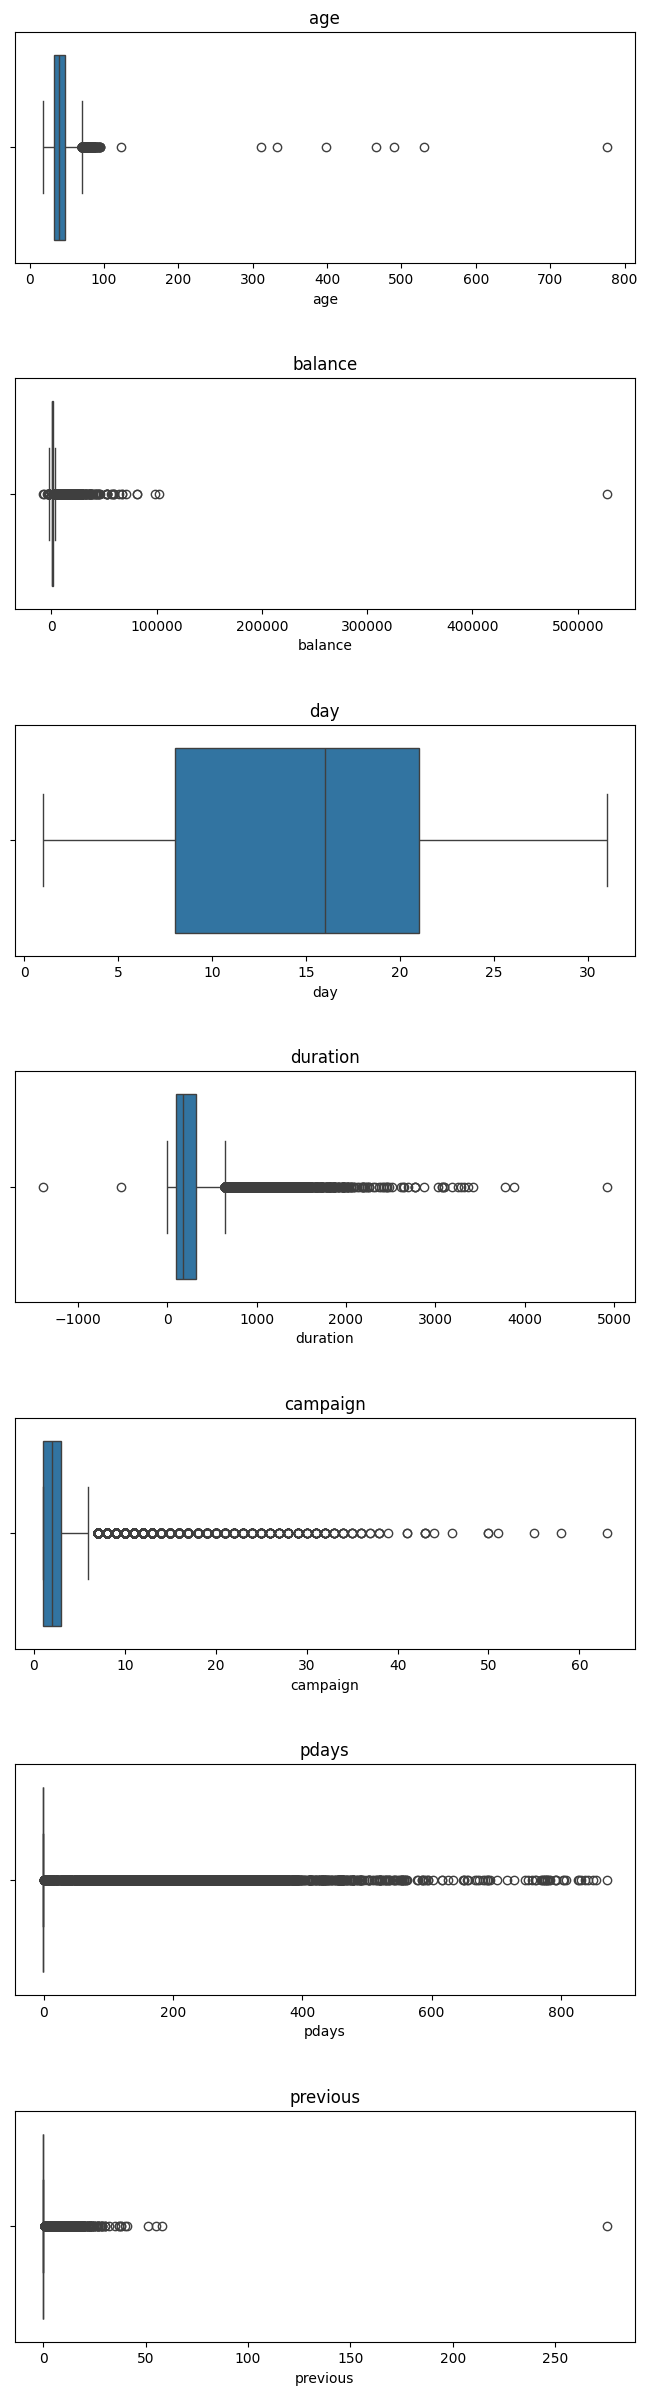

In [22]:
# Outliers // valores extremos -- siempre se da en variables con valores num
# generar graficos individuales porque las variables num estan en rangos diferentes

fig, ax = plt.subplots(nrows=7, ncols=1, figsize=(8,30))  # generamos los plots vacios

fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(cols_num):
  sns.boxplot(x=col, data=data, ax=ax[i])
  ax[i].set_title(col)

/tmp/ipython-input-2109236791.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30)    #
/tmp/ipython-input-2109236791.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30)    #
/tmp/ipython-input-2109236791.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30)    #
/tmp/ipython-input-2109236791.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30)    #
/tmp/ipython-input-2109236791.py:11: UserWarning: set_ticklabels() shoul

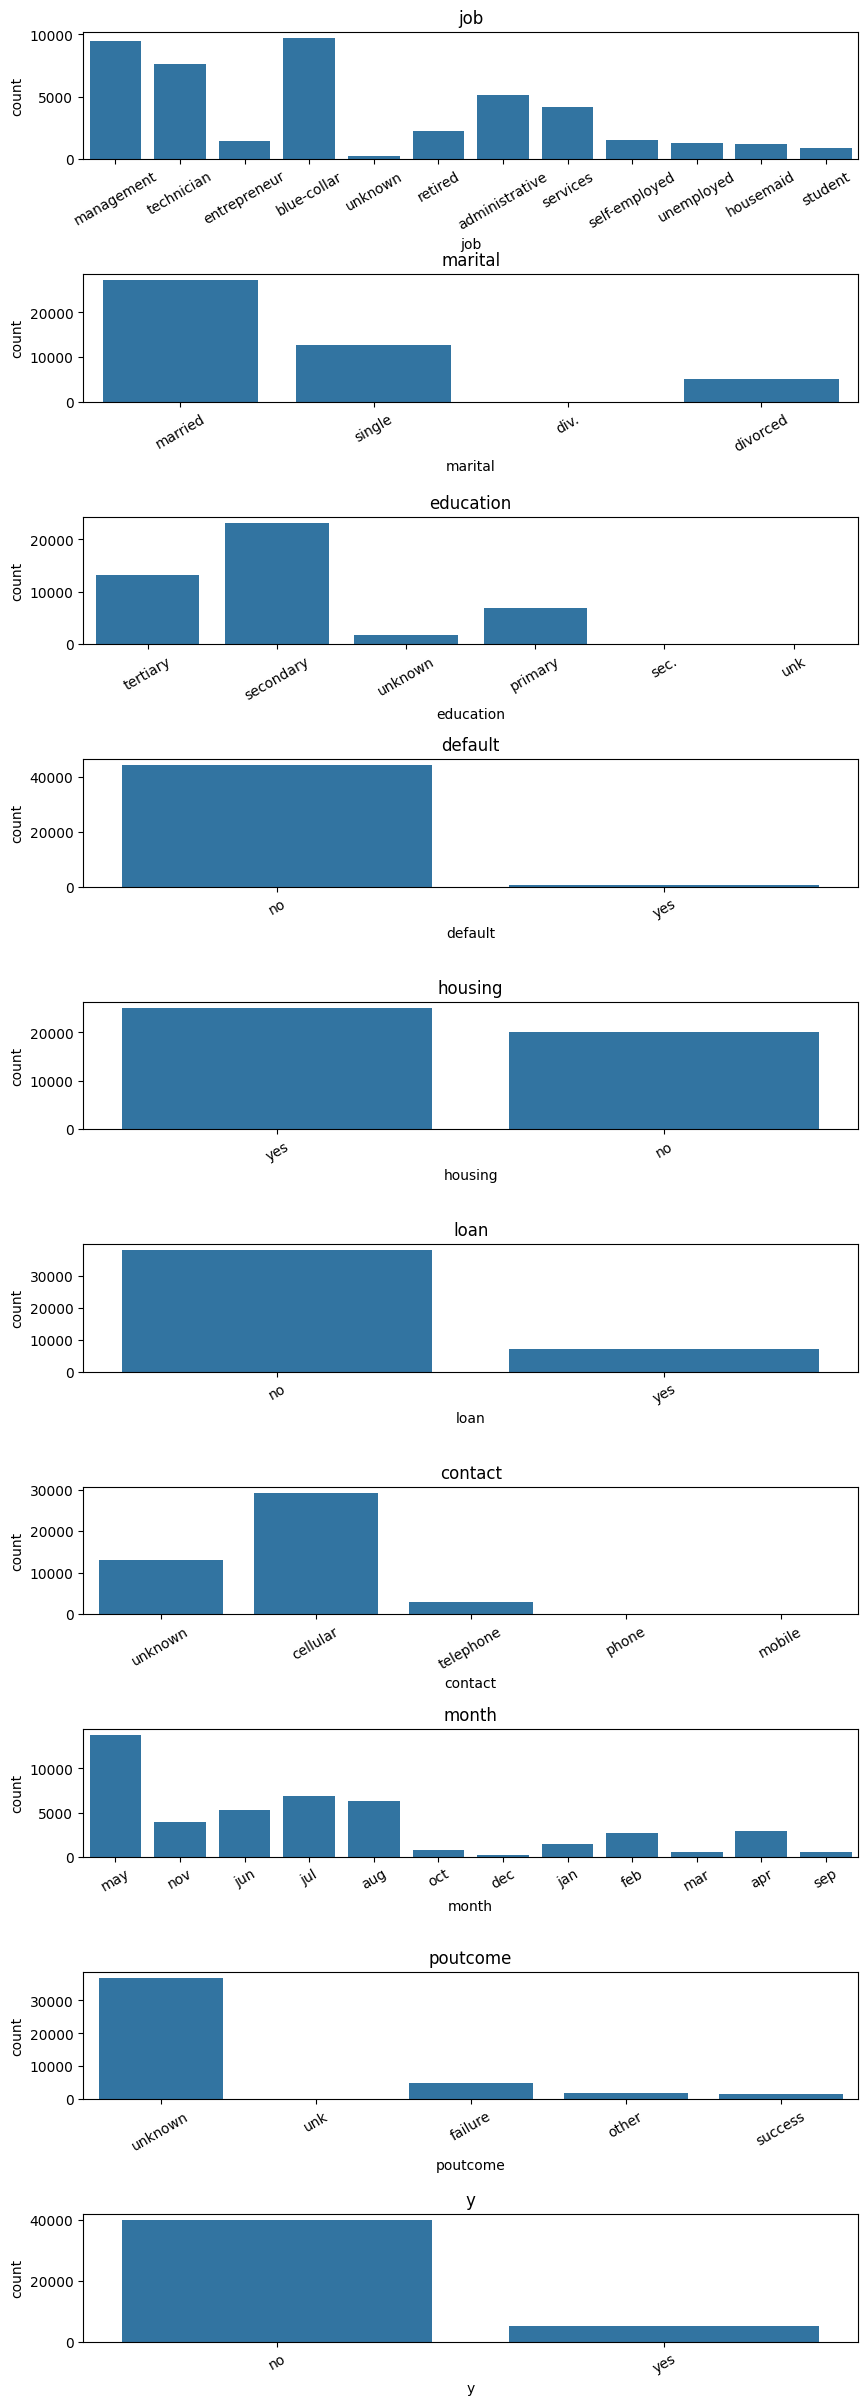

In [32]:
# Errores tipograficos en variables categoricas

cols_cat = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']      # Graficar los subniveles de cada variable categorica

fig, ax = plt.subplots(nrows=10, ncols=1, figsize=(10,30))
fig.subplots_adjust(hspace=0.9)

for i, col in enumerate(cols_cat):
  sns.countplot(x=col, data=data, ax=ax[i])
  ax[i].set_title(col)
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30)    #

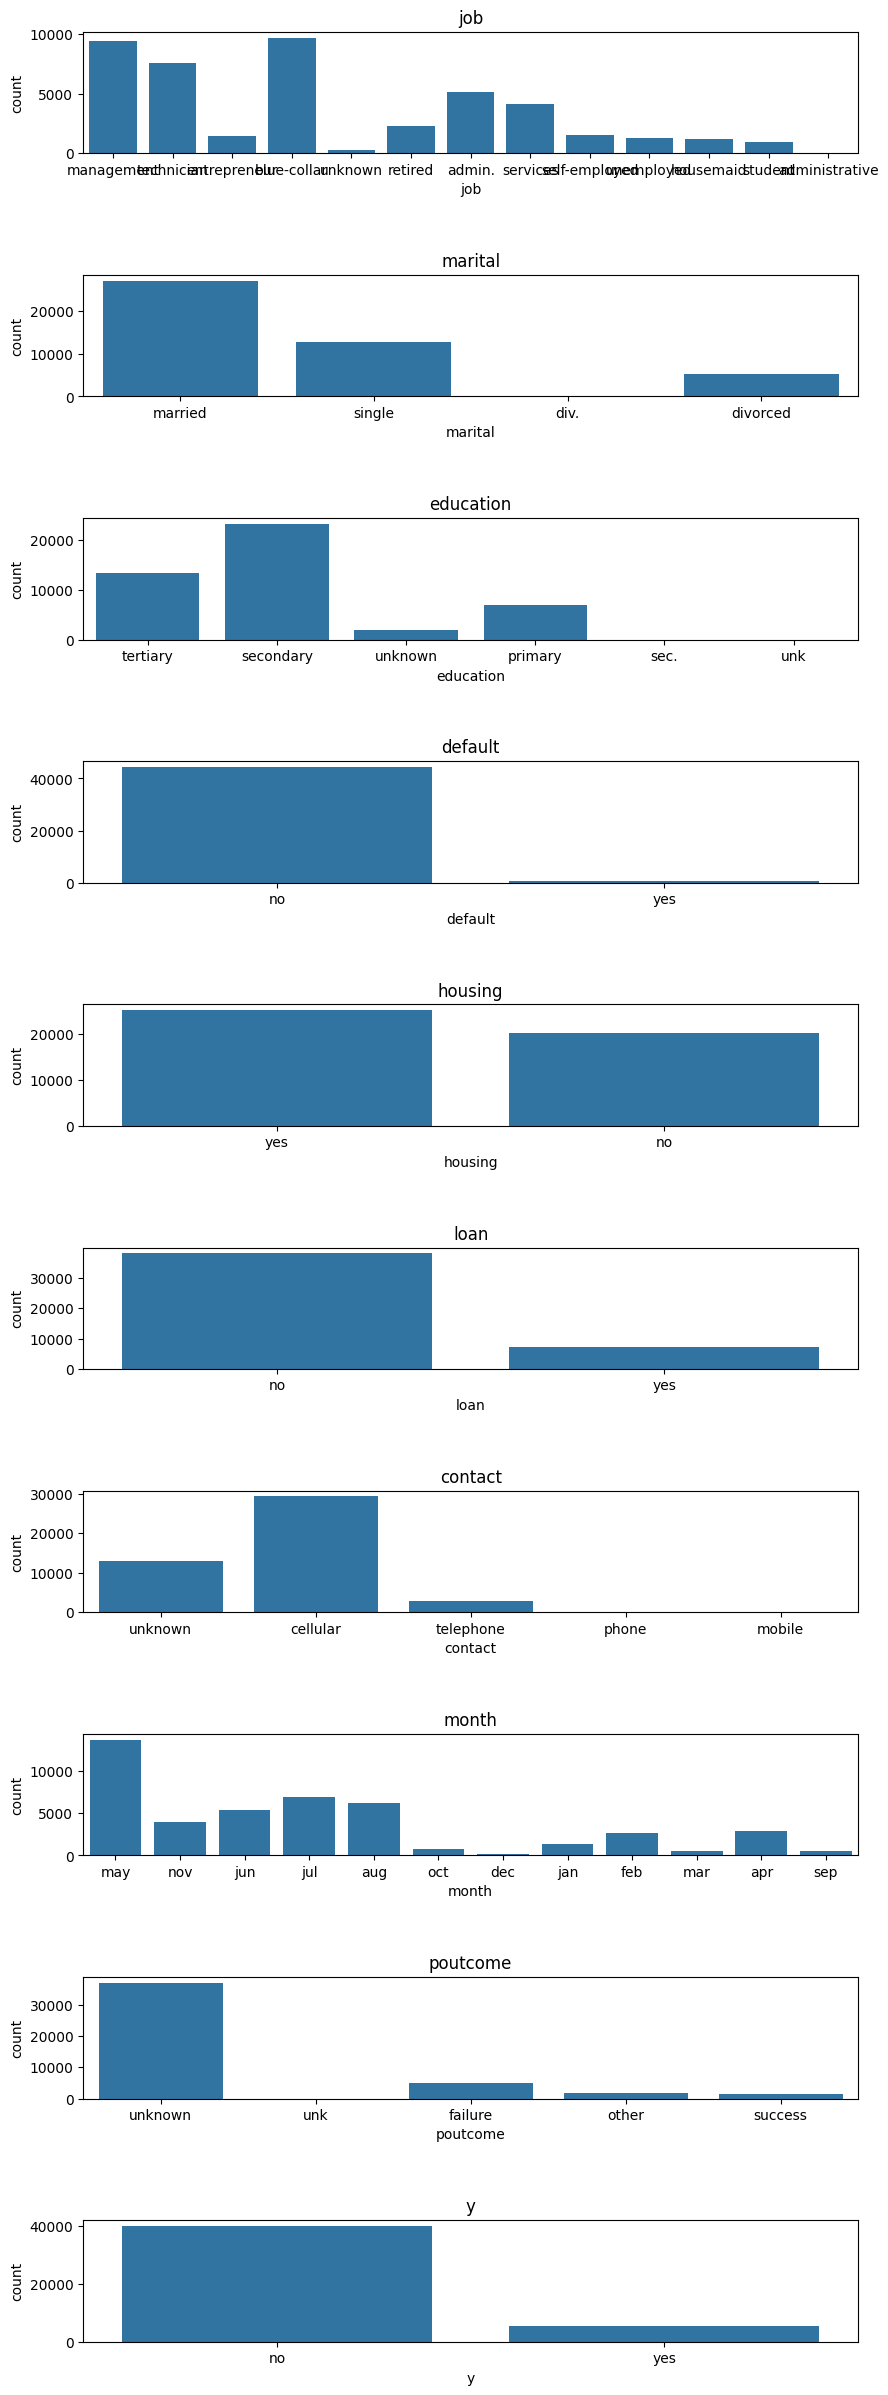

In [26]:
# Unifiquemos los subniveles que estan escritos en mayuscula o minuscula o casos similares

for column in cols_cat:                                   # Representar en minuscula solo si la variable es categorica
  data[column] = data[column].str.lower()                 # lower es una funcion que pasa todos los str a minuscula

#generamos los graficos nuevamente

fig, ax = plt.subplots(nrows=10, ncols=1, figsize=(10,30))
fig.subplots_adjust(hspace=1)

for i, col in enumerate(cols_cat):
  sns.countplot(x=col, data=data, ax=ax[i])
  ax[i].set_title(col)

In [27]:
# Corregir columna por colummna los nombres de igual valor pero que estan escritos de mal forma

In [31]:
# job: unificar admin. y administrative

print(data['job'].unique())

data['job'] = data['job'].str.replace('admin.', 'administrative', regex=False)   # reemplazamos las variables escritas de distinta forma pero de igual valor por la original

print(data['job'].unique())

['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'administrative' 'services' 'self-employed' 'unemployed'
 'housemaid' 'student']
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'administrative' 'services' 'self-employed' 'unemployed'
 'housemaid' 'student']


In [33]:
# Marital: unificar div. y divorced

data['marital'] = data['marital'].str.replace('div.', 'divorced', regex=False)

print(data['marital'].unique())


['married' 'single' 'divorced']


In [35]:
# Education: unificar sec. y secondary, unk yunkown

data['education'] = data['education'].str.replace('sec.', 'secondary', regex=False)
data[data['education'] == 'unk'] = 'unknown'

print(data['education'].unique())

['tertiary' 'secondary' 'unknown' 'primary']


/tmp/ipython-input-2942652502.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'unknown' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data[data['education'] == 'unk'] = 'unknown'
/tmp/ipython-input-2942652502.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data[data['education'] == 'unk'] = 'unknown'
/tmp/ipython-input-2942652502.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'unknown' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data[data['education'] == 'unk'] = 'unknown'
/tmp/ipython-input-2942652502.py:4: FutureWarning: Setting an item of inco

In [38]:
# Contact: unificar telephone y phone

data[data['contact'] == 'phone'] = 'telephone'

print(data['contact'].unique())

['unknown' 'cellular' 'telephone' 'mobile']


In [39]:
# Poutcome unificar unk y unknown

data[data['poutcome'] == 'unk'] = 'unknown'

print(data['poutcome'].unique())

['unknown' 'failure' 'telephone' 'success' 'other']


In [40]:
data.shape # dataset cleanet

(45203, 17)